In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import regularizers

In [253]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [254]:
train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [255]:
test.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


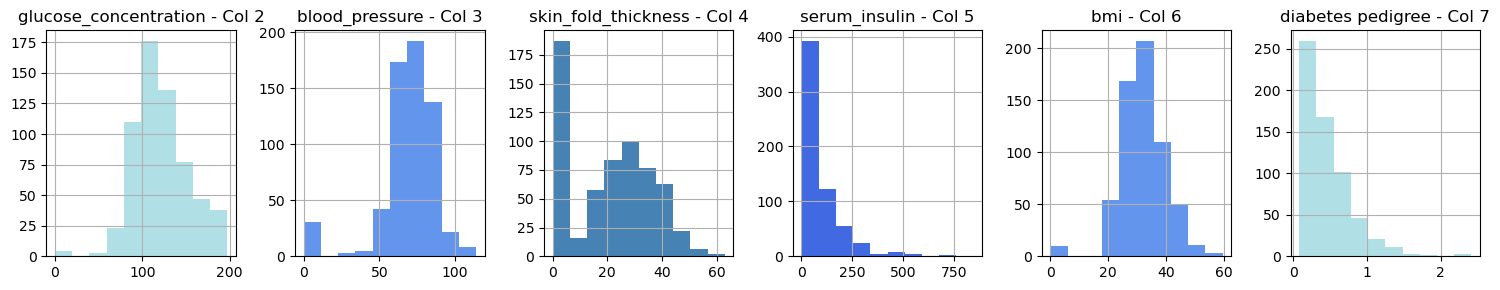

In [256]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))

train['glucose_concentration'].hist(ax=axes[0], bins=10, color='PowderBlue')
axes[0].set_title('glucose_concentration - Col 2')
train['blood_pressure'].hist(ax=axes[1], bins=10, color='CornflowerBlue')
axes[1].set_title('blood_pressure - Col 3')
train['skin_fold_thickness'].hist(ax=axes[2], bins=10, color='SteelBlue')
axes[2].set_title('skin_fold_thickness - Col 4')
train['serum_insulin'].hist(ax=axes[3], bins=10, color='royalblue')
axes[3].set_title('serum_insulin - Col 5')
train['bmi'].hist(ax=axes[4], bins=10, color='CornflowerBlue')
axes[4].set_title('bmi - Col 6')
train['diabetes pedigree'].hist(ax=axes[5], bins=10, color='PowderBlue')
axes[5].set_title('diabetes pedigree - Col 7')

plt.tight_layout()
plt.show()

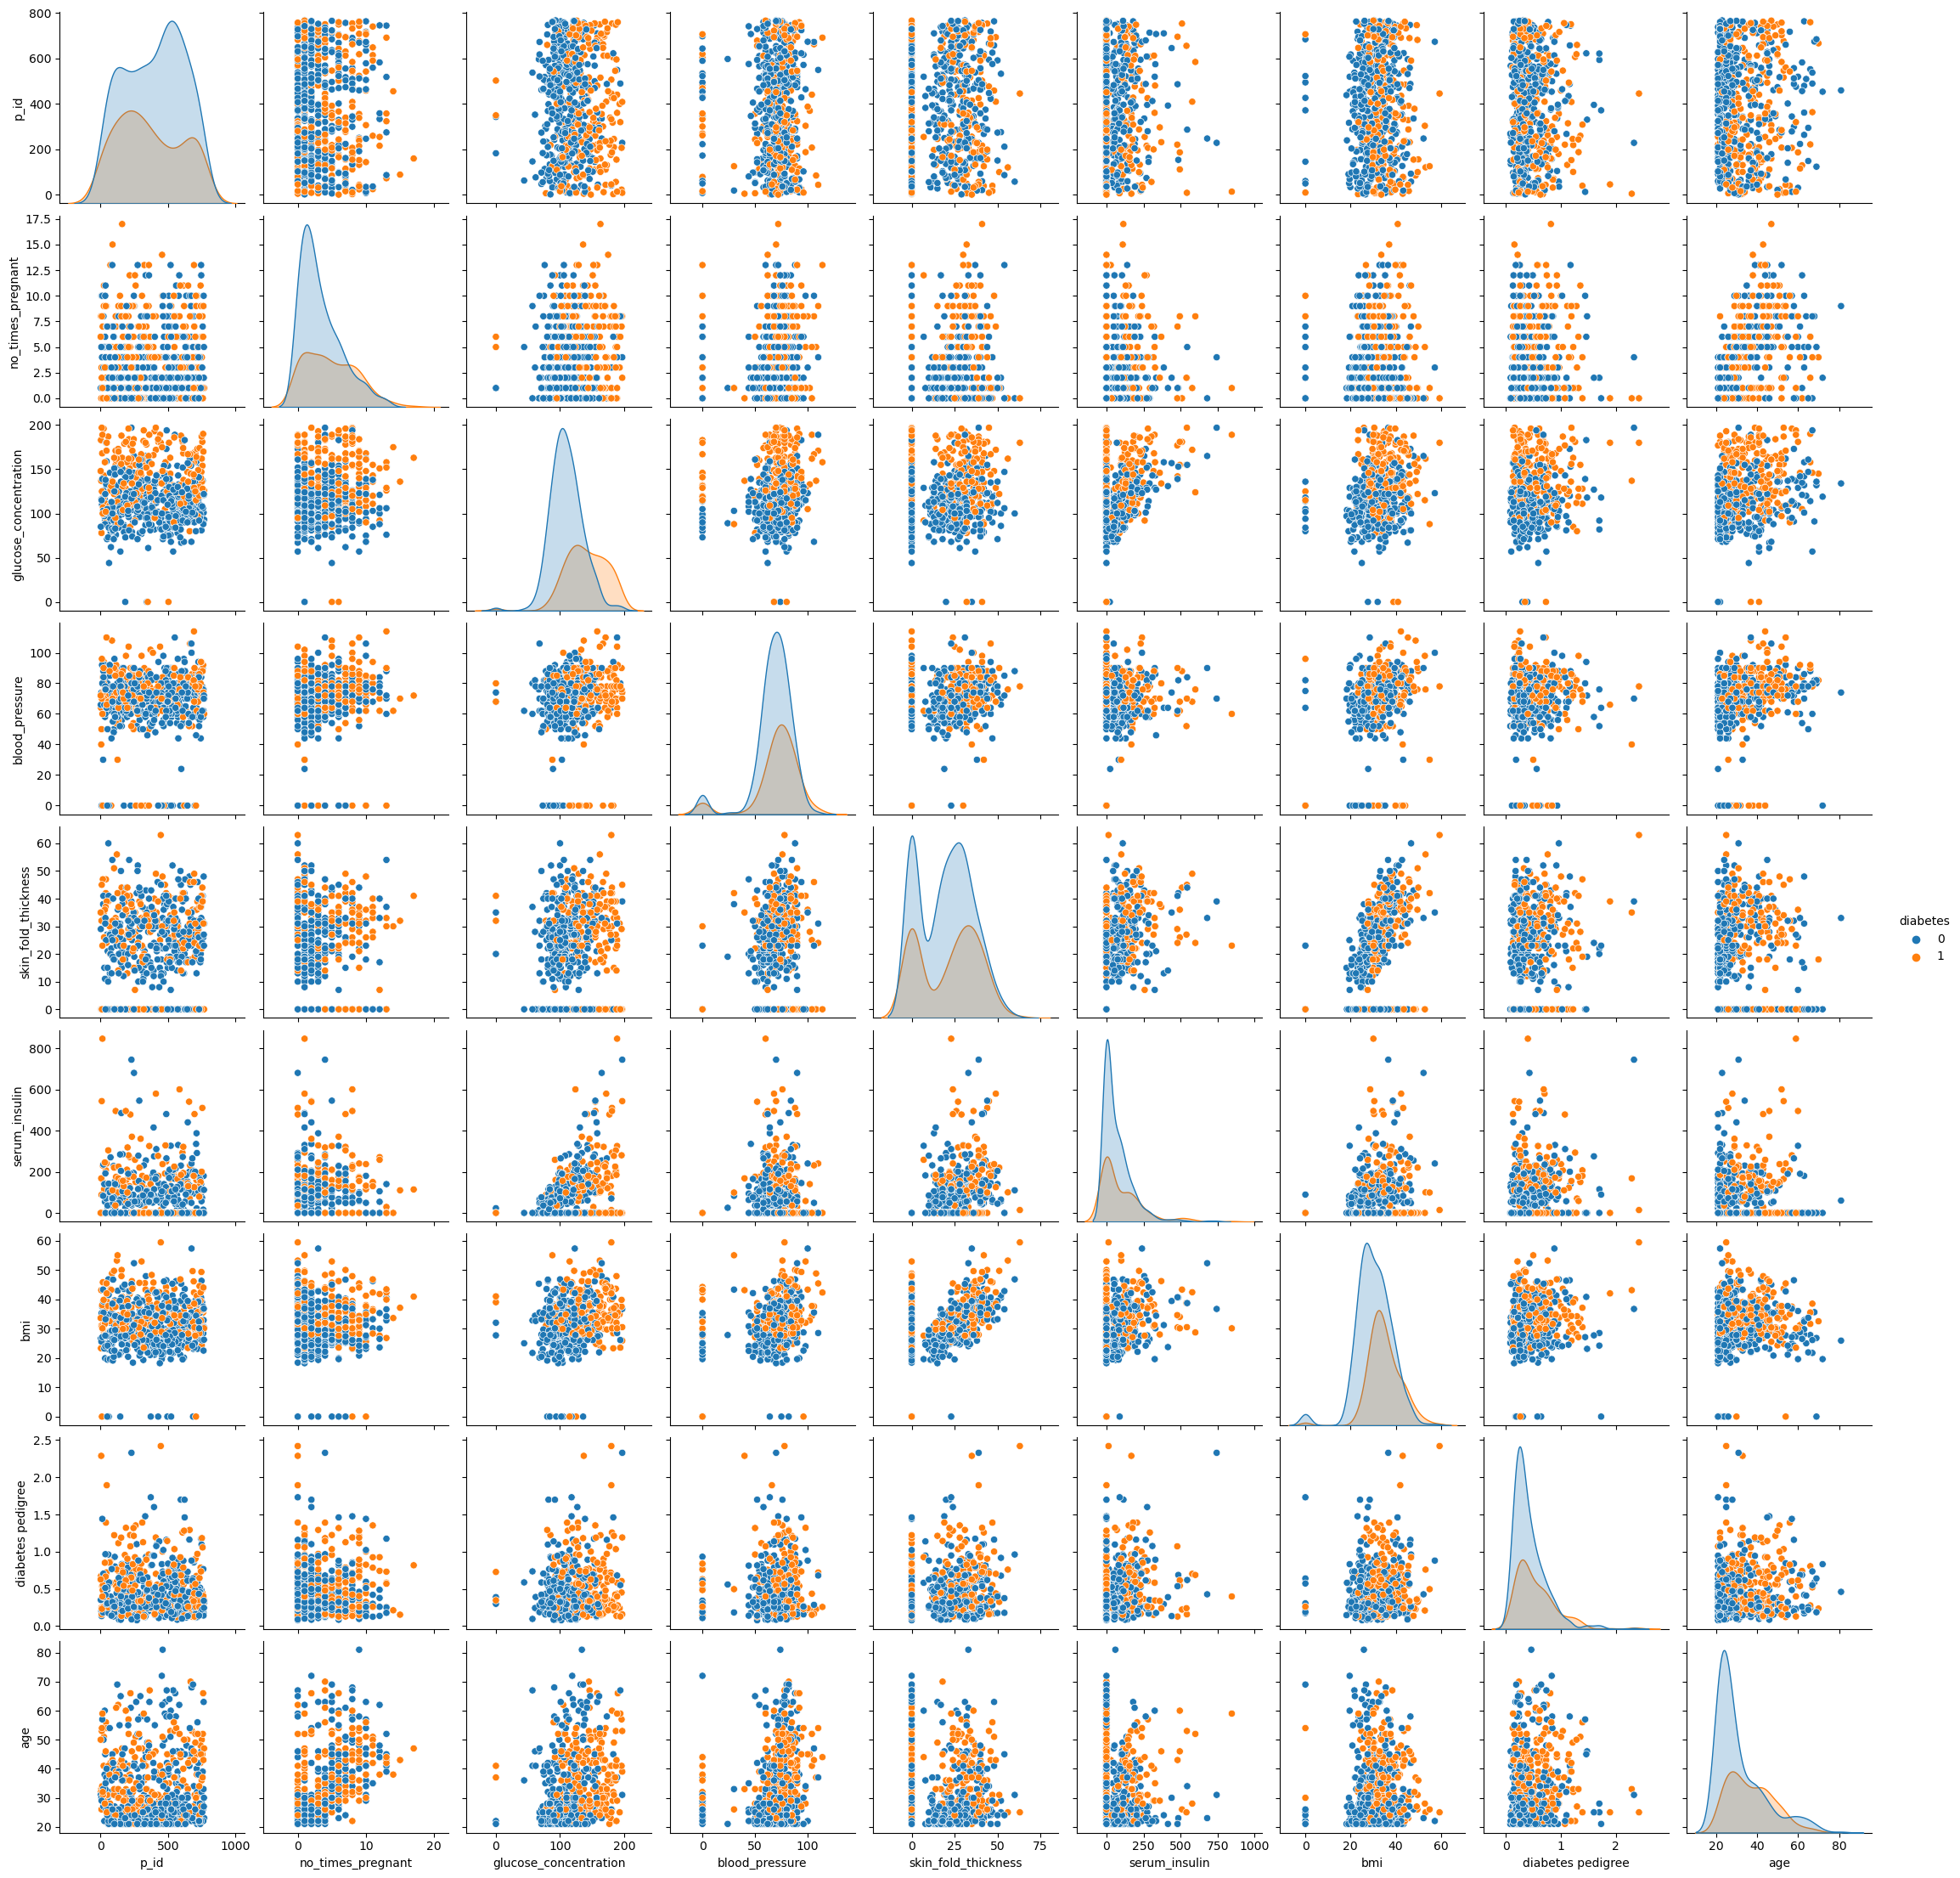

In [257]:
import seaborn as sns
# draw pairplot for ‘diabetes’ and other indicators
sns.pairplot(train,hue="diabetes")
plt.show()

# Preprocessing

### Missing Data

In [258]:
# replace with NaN
colume = ['glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin']
train[colume] = train[colume].replace(0,np.nan)

In [259]:
# delete the row with empty data more than 20%
thresh_count = train.shape[0]*0.8
train = train.dropna(thresh=thresh_count,axis=1)

In [260]:
train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,bmi,diabetes pedigree,age,diabetes
0,316,2,112.0,68.0,34.1,0.315,26,0
1,25,11,143.0,94.0,36.6,0.254,51,1
2,710,2,93.0,64.0,38.0,0.674,23,1
3,658,1,120.0,80.0,38.9,1.162,41,0
4,542,3,128.0,72.0,32.4,0.549,27,1


In [261]:
from sklearn.impute import SimpleImputer
# fix the remaining missing data
imr = SimpleImputer()
colume_2 = ['glucose_concentration','blood_pressure']
train[colume_2] = imr.fit_transform(train[colume_2])

### Normalize

In [262]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# MinMaxScaler
x_scaled = min_max_scaler.fit_transform(train.values)
train = pd.DataFrame(x_scaled, columns=train.columns)
y_scaled = min_max_scaler.fit_transform(test.values)
test = pd.DataFrame(y_scaled, columns=test.columns)

In [263]:
train = train.drop('p_id',axis=1)
train.head()

,no_times_pregnant,glucose_concentration,blood_pressure,bmi,diabetes pedigree,age,diabetes
0,0.117647,0.444444,0.488889,0.574074,0.101196,0.083333,0.0
1,0.647059,0.647059,0.777778,0.616162,0.075149,0.500000,1.0
2,0.117647,0.320261,0.444444,0.639731,0.254483,0.033333,1.0
3,0.058824,0.496732,0.622222,0.654882,0.462852,0.333333,0.0
4,0.176471,0.549020,0.533333,0.545455,0.201110,0.100000,1.0


In [264]:
test.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,0.589918,0.857143,0.703518,0.696721,0.333333,0.000000,0.557377,0.077935,0.444444
1,0.554496,0.428571,0.512563,0.737705,0.393939,0.000000,0.532042,0.287384,0.155556
2,0.865123,0.500000,0.487437,0.622951,0.323232,0.191983,0.609538,0.383341,0.244444
3,0.284741,0.500000,0.899497,0.778689,0.313131,0.000000,0.509687,0.038967,0.866667
4,0.241144,0.428571,0.437186,0.655738,0.000000,0.000000,0.345753,0.000000,0.244444


### Sampling

In [265]:
x = train.drop('diabetes',axis=1)
y = train['diabetes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

# Classification

In [266]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [269]:
classifiers = [
    KNeighborsClassifier(2),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=3,min_samples_split=3),
    MLPClassifier(hidden_layer_sizes=(20,20),max_iter=100),
    RandomForestClassifier(max_depth=5,min_samples_split=3),
    ]

log = []
for clf in classifiers:
    clf.fit(x_train,y_train)
    name = clf.__class__.__name__
    print('*'*30)
    print(name)
    predictions = clf.predict(x_test)
    acc = accuracy_score(y_test,predictions)
    print('Accuracy:{:.4%}'.format(acc))
    log.append([name,acc*100])
    
print('*'*30)

******************************
KNeighborsClassifier
Accuracy:76.7568%
******************************
GaussianNB
Accuracy:81.0811%
******************************
DecisionTreeClassifier
Accuracy:77.8378%
******************************
MLPClassifier
Accuracy:82.1622%


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


******************************
RandomForestClassifier
Accuracy:83.2432%
******************************


### Classfier: RandomForestClassifier

In [270]:
x_test = test.drop(['p_id','skin_fold_thickness','serum_insulin'],axis=1)
x_test.head()

,no_times_pregnant,glucose_concentration,blood_pressure,bmi,diabetes pedigree,age
0,0.857143,0.703518,0.696721,0.557377,0.077935,0.444444
1,0.428571,0.512563,0.737705,0.532042,0.287384,0.155556
2,0.500000,0.487437,0.622951,0.609538,0.383341,0.244444
3,0.500000,0.899497,0.778689,0.509687,0.038967,0.866667
4,0.428571,0.437186,0.655738,0.345753,0.000000,0.244444


In [271]:
x_train.shape

(429, 6)

In [272]:
x_test.shape

(154, 6)

In [273]:
from sklearn.ensemble import RandomForestClassifier
RT = RandomForestClassifier(max_depth=6,min_samples_split=3)
RT.fit(x_train,y_train)
raw_predictions = RT.predict(x_test)
predictions = np.round(raw_predictions).astype(int)

In [274]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [275]:
output = pd.DataFrame({'p_id':sub.p_id,'diabetes':predictions})
output.to_csv('submission1210_3.csv', index=False)

# accuracy score

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, raw_predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5065
